<p>Adagrad Function</p>

<p> Write a program to implement adagard for objective function <b>x<sup>2</sup>, x<sup>2</sup> + y<sup>2</sup> </b>and plot it in 2D or 3D graph also show the exectution steps on contour.

In [16]:
# example of plotting the adagrad search on a contour plot of the test function
from math import sqrt
import numpy as  np
from numpy import asarray
from numpy import arange
from numpy.random import rand
from numpy.random import seed
from numpy import meshgrid
from matplotlib import pyplot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [17]:
def adagrad(f, grad_f, lr=0.1, eps=1e-8, x_init=1.0, y_init=1.0, max_iters=100):
    x, y = x_init, y_init
    G_x, G_y = 0, 0
    xs, ys = [x], [y]
    for i in range(max_iters):
        grad_x, grad_y = grad_f(x, y)
        G_x += grad_x ** 2
        G_y += grad_y ** 2
        lr_x = lr / np.sqrt(G_x + eps)
        lr_y = lr / np.sqrt(G_y + eps)
        x -= lr_x * grad_x
        y -= lr_y * grad_y
        xs.append(x)
        ys.append(y)
        if i % 10 == 0:
            print(f"Iteration {i}: x = {x:.3f}, y = {y:.3f}")
    return x, y, xs, ys

In [18]:
def f1(x, y):
    return x**2, 2*y

In [19]:
# Adagrad for f1(x, y) = x^2
x_min1, _, xs1, _ = adagrad(f1, lambda x, y: (2*x, 0))

Iteration 0: x = 0.900, y = 1.000
Iteration 10: x = 0.531, y = 1.000
Iteration 20: x = 0.363, y = 1.000
Iteration 30: x = 0.257, y = 1.000
Iteration 40: x = 0.184, y = 1.000
Iteration 50: x = 0.133, y = 1.000
Iteration 60: x = 0.096, y = 1.000
Iteration 70: x = 0.070, y = 1.000
Iteration 80: x = 0.050, y = 1.000
Iteration 90: x = 0.037, y = 1.000


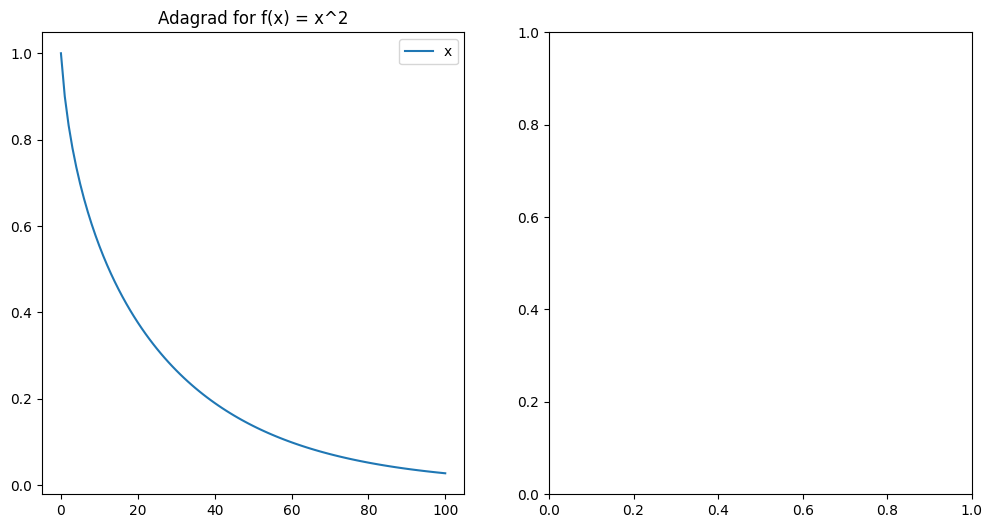

In [36]:
# Plot the optimization steps
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].plot(xs1, label="x")
ax[0].set_title("Adagrad for f(x) = x^2")
ax[0].legend()

>0 f([-0.88273652]) = 0.77922
>0 f([-0.88273652]) = 0.77922
>0 f([-0.88273652]) = 0.77922
>0 f([-0.88273652]) = 0.77922
>0 f([-0.88273652]) = 0.77922
>0 f([-0.88273652]) = 0.77922
>0 f([-0.88273652]) = 0.77922
>0 f([-0.88273652]) = 0.77922
>0 f([-0.88273652]) = 0.77922
>0 f([-0.88273652]) = 0.77922
>0 f([-0.88273652]) = 0.77922
>0 f([-0.88273652]) = 0.77922
>0 f([-0.88273652]) = 0.77922
>0 f([-0.88273652]) = 0.77922
>0 f([-0.88273652]) = 0.77922
>0 f([-0.88273652]) = 0.77922
>0 f([-0.88273652]) = 0.77922
>0 f([-0.88273652]) = 0.77922
>0 f([-0.88273652]) = 0.77922
>0 f([-0.88273652]) = 0.77922
>0 f([-0.88273652]) = 0.77922
>0 f([-0.88273652]) = 0.77922
>0 f([-0.88273652]) = 0.77922
>0 f([-0.88273652]) = 0.77922
>0 f([-0.88273652]) = 0.77922
>0 f([-0.88273652]) = 0.77922
>0 f([-0.88273652]) = 0.77922
>0 f([-0.88273652]) = 0.77922
>0 f([-0.88273652]) = 0.77922
>0 f([-0.88273652]) = 0.77922


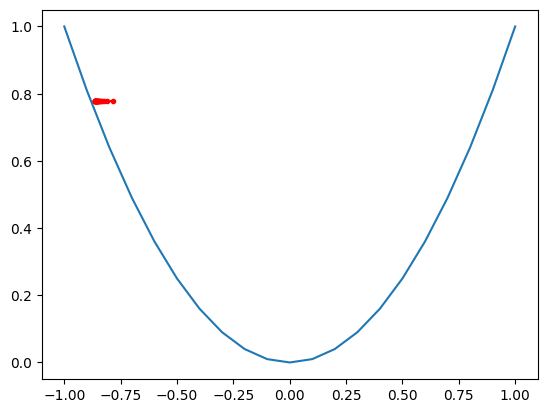

In [34]:
# example of plotting a gradient descent search on a one-dimensional function
from numpy import asarray
from numpy import arange
from numpy.random import rand
from matplotlib import pyplot

# objective function
def objective(x):
	return x**2.0

# derivative of objective function
def derivative(x):
	return x * 2.0

# gradient descent algorithm
def adagrad(objective, derivative, bounds, n_iter, step_size):
	# track all solutions
	solutions, scores = list(), list()
	# generate an initial point
	solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
	# list of the sum square gradients for each variable
	sq_grad_sums = [0.0 for _ in range(bounds.shape[0])]
    # run the gradient descent
	for i in range(n_iter):
		# calculate gradient
		gradient = derivative(solution)
		# update the sum of the squared partial derivatives
		for i in range(gradient.shape[0]):
			sq_grad_sums[i] += gradient[i]**2.0
		# build solution
		new_solution = list()
		for i in range(solution.shape[0]):
			# calculate the learning rate for this variable
			alpha = step_size / (1e-8 + sqrt(sq_grad_sums[i]))
			# calculate the new position in this variable
			value = solution[i] - alpha * gradient[i]
			new_solution.append(value)
		solution_eval = objective(solution[0])
		# store solution
        # solution_eval = objective(solution[0])
		solutions.append(new_solution)
		scores.append(solution_eval)
		# report progress
		print('>%d f(%s) = %.5f' % (i, solution, solution_eval))
	return [solutions, scores]

# define range for input
bounds = asarray([[-1.0, 1.0]])
# define the total iterations
n_iter = 30
# define the step size
step_size = 0.1
# perform the gradient descent search
solutions, scores = adagrad(objective, derivative, bounds, n_iter, step_size)
# sample input range uniformly at 0.1 increments
inputs = arange(bounds[0,0], bounds[0,1]+0.1, 0.1)
# compute targets
results = objective(inputs)
# create a line plot of input vs result
pyplot.plot(inputs, results)
# plot the solutions found
pyplot.plot(solutions, scores, '.-', color='red')
# show the plot
pyplot.show()